In [412]:
# import
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

In [413]:
# house 1 power
blk1=r"/Volumes/Expansion Drive/dataverse_files/house1_power_blk1.csv"
blk2=r"/Volumes/Expansion Drive/dataverse_files/house1_power_blk2.csv"

# house 2 power
blk3=r"/Volumes/Expansion Drive/dataverse_files/house2_power_blk1.csv"

In [414]:
# load datasets
df1 = pd.read_csv(blk1, sep = ",", parse_dates=['unix_ts'])
df2 = pd.read_csv(blk2, sep = ",", parse_dates=['unix_ts'])
df3 = pd.read_csv(blk3, sep = ",", parse_dates=['unix_ts'])

In [415]:
df1.head(30)

,unix_ts,ihd,mains,sub1,sub2,sub3,sub4,sub5,sub6,sub7,...,sub15,sub16,sub17,sub18,sub19,sub20,sub21,sub22,sub23,sub24
0,1454832000,NaN,646,0,1,0,2,0,0,5,...,1,0,5,4,20,113,42,3,0,161
1,1454832001,NaN,636,0,1,0,1,0,0,5,...,1,0,5,4,20,113,41,3,0,152
2,1454832002,NaN,640,0,1,0,2,0,0,5,...,1,0,5,4,21,113,42,3,0,154
3,1454832003,NaN,640,0,1,0,2,0,0,5,...,1,0,5,4,20,113,42,3,0,154
4,1454832004,NaN,643,0,1,0,2,0,0,7,...,1,0,5,4,21,113,42,3,0,153
5,1454832005,NaN,641,0,1,0,2,0,0,5,...,1,0,5,4,21,113,42,3,0,153
6,1454832006,NaN,628,0,1,0,2,0,0,5,...,1,0,5,4,21,114,42,3,0,152
7,1454832007,NaN,629,0,1,0,2,0,0,5,...,1,0,5,4,20,113,42,3,0,154
8,1454832008,NaN,630,0,1,0,2,0,0,5,...,1,0,5,4,20,114,42,3,0,155
9,1454832009,NaN,628,0,1,0,2,0,0,5,...,1,0,5,4,20,113,42,3,0,152


In [416]:
#transform time from unix timestamp to YYYY-MM-DD HHMMSS
df1['unix_ts']=pd.to_datetime(df1['unix_ts'],unit='s')
df2['unix_ts']=pd.to_datetime(df2['unix_ts'],unit='s')
df3['unix_ts']=pd.to_datetime(df3['unix_ts'],unit='s')

In [417]:
# set index column
df1 = df1.set_index('unix_ts')
df2 = df2.set_index('unix_ts')
df3 = df3.set_index('unix_ts')

In [418]:
df1=df1.drop(['mains', 'ihd'], axis=1)
df2=df2.drop(['mains', 'ihd'], axis=1)
df3=df3.drop(['mains', 'ihd'], axis=1)

In [419]:
# select appliances

kitchen_plugs=df1["sub3"]+df1["sub4"]
df1["kitchen_plugs"]=kitchen_plugs

dryer=df1["sub5"]+df1["sub6"]
df1["dryer"]=dryer

kitchen_plugs=df2["sub3"]+df2["sub4"]
df2["kitchen_plugs"]=kitchen_plugs

dryer=df2["sub5"]+df2["sub6"]
df2["dryer"]=dryer

dryer=df3["sub4"]+df3["sub5"]
df3["dryer"]=dryer

kitchen_plugs=df3["sub14"]+df3["sub15"]
df3["kitchen_plugs"]=kitchen_plugs

df1=df1.rename(columns={'sub9':'cloth_washer', 'sub8':'fridge'})
df2=df2.rename(columns={'sub9':'cloth_washer', 'sub8':'fridge'})
df3=df3.rename(columns={'sub10':'cloth_washer', 'sub11':'fridge'})

In [420]:
df1=df1.filter(['unix_ts', 'kitchen_plugs', 'dryer', 'cloth_washer', 'fridge', 'agg'])
df2=df2.filter(['unix_ts', 'kitchen_plugs', 'dryer', 'cloth_washer', 'fridge', 'agg'])
df3=df3.filter(['unix_ts', 'kitchen_plugs', 'dryer', 'cloth_washer', 'fridge', 'agg'])

In [425]:
# get full weeks for model to train/test/validate on

# 9 full weeks house 1
df1=df1.loc['2016-02-08 00:00:00':'2016-02-14 23:59:59']
df2=df2.loc['2016-03-07':'2016-05-01']

# 7 full weeks house 2
df3=df3.loc['2017-09-18':'2017-11-05']

In [426]:
df=df1.append(df2)

In [427]:
# creating normalized datasets df_norm for house 1 and df2_norm for house 2

df_norm=df
df_norm=((df_norm-df_norm.min())/(df_norm.max()-df_norm.min()))

df2_norm=df3
df2_norm=((df2_norm-df2_norm.min())/(df2_norm.max()-df2_norm.min()))

In [431]:
# get daily readings house 1

daily_groups=df.resample('D')
df_daily=daily_groups.sum()


# get daily readings house 2
daily2_groups=df3.resample('D')
df2_daily=daily2_groups.sum()


In [432]:
# normalize daily data

df2_daily=((df2_daily-df2_daily.min())/(df2_daily.max()-df2_daily.min()))
df_daily=((df_daily-df_daily.min())/(df_daily.max()-df_daily.min()))
df_daily=df_daily.reset_index()
df_daily=df_daily.drop(df_daily.index[7:28])
df_daily=df_daily.set_index('unix_ts')


In [436]:
# split data into standard weeks: train and test data
# train: 8 weeks 
# test: on last week
# restructure train and test into windows of weekly data

#df=df_daily_kitchen.loc['2016-02-08':'2016-04-24']

from numpy import split
from numpy import array

def split_dataset(data):
    train = data[:56]
    test = data[56:]
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

train, test = split_dataset(df_daily.values)
print(train.shape)
print(test.shape)

# (weeks, days(sequences), variables)

(8, 7, 4)
(1, 7, 4)


In [437]:
# summarize the performance of a model using a single score
# root mean square error (RMSE) score

def evaluate_forecasts(actual, predicted):
    scores = list()
    for i in range(actual.shape[1]):
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        rmse = sqrt(mse)
        scores.append(rmse)
        r = 0
        for row in range(actual.shape[0]):
            for col in range(actual.shape[1]):
                r += (actual[row, col] - predicted[row, col])**2
        score = sqrt(r / (actual.shape[0] * actual.shape[1]))
    return score, scores



In [401]:
# walk-forward validation
# make one week prediction
# summarize scores

def evaluate_model(train, test, n_input):
    model = build_model(train, n_input)
    history = [x for x in train]
    predictions = list()
    for i in range(len(test)):
        yhat_sequence = forecast(model, history, n_input)
        predictions.append(yhat_sequence)
        history.append(test[i, :])
        predictions = array(predictions)
        score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores
    


def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

In [402]:
# LSTM
# training data must be prepared to fit the model
# test data must be prepared to fit the model
# use the model to make predictions with a final model in the future



In [438]:
# convert history into inputs and outputs

# reshape()
# start with prior seven days
# LSTM model expects data to have the shape : (samples, timesteps, features)
# our training dataset has 13 weeks of data, 7 days (week) and we want to test 1 variable
# (13, 7, 1) is the shape that we need

# loop
# flatten the data so we have 5 time series sequences (5 columns/variables)
# step over the entire history one time step at a time 
# iterate over the time steps and divide data into overlappings windows
# each iteration moves aloing one time step and predicts the subsequent seven days
# define the end of the input sequence
# ensure we have enough data for this instance
# move along one time step
# takes a list of weeks(history) and number of timesteps to use as inputs
# returns overlapping moving window format
# 

def to_supervised(train, n_input, n_out=7):
    data=train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0
    for _ in range(len(data)):
        in_end = in_start + n_input
        out_end = in_end + n_out
        if out_end <= len(data):
            x_input = data[in_start:in_end, 0]
            x_input = x_input.reshape((len(x_input), 1))
            X.append(x_input)
            y.append(data[in_end:out_end, 0])
        in_start += 1
    return array(X), array(y)


In [404]:
# develop a model with single hidden LSTM layer with 200 units
# number of units in hidden layer is unrelated to the number of time steps in the input sequences
# LSTM layer is followed by a fully connected layer with 200 nodes that will interpret the features learned by the LSTM layer
# finally an output layer will directly predict a vector with seven elements --> one for each day in the output sequence

# use mean squared error loss function
# efficient Adam implementation of stochastic gradient descent and fit the model for 70 epochs with batch size of 16

In [439]:
# build_model() to prepare training data, define model and fit model on training data
# returning the fit model ready for making predictions
# train the model

def build_model(train, n_input):
    train_x, train_y = to_supervised(train, n_input)
    verbose, epochs, batch_size = 0, 50, 32
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    model = Sequential()
    model.add(LSTM(200, activation='sigmoid', input_shape=(n_timesteps, n_features)))
    model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse', optimizer='adam')
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model



In [406]:
# model expects shape of an input to be three dimensional
# in this case: [1, 7, 1] one sample, seven days of one feature
# in order to predict the next standard week, we need to retrieve the last days of obervations
# flatten data to remove the weekly structure
# retrieve the last seven days of dayly total power consumed

In [440]:
#univariate multi-step lstm

# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1] --> 3 dimentional
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forcast value
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores, predictions, history


predictions from walk forward validation: [[0.40780365 0.35214555 0.33886427 0.37290114 0.3419869  0.3325069
  0.32018974]]
yhat: [0.36894524 0.36432344 0.38308862 0.31683907 0.39337897 0.38629088
 0.3594744 ]
LSTM: [0.192] 0.1, 0.1, 0.1, 0.1, 0.4, 0.1, 0.2


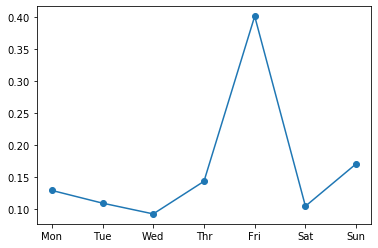

In [441]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


days = ['Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']

n_input = 7 # number of prior investigations that the model will use as input to make prediction

score, scores, predictions, history = evaluate_model(train, test, n_input)

model = build_model(train, n_input)



print('predictions from walk forward validation:', predictions)
print('yhat:', yhat)
summarize_scores('LSTM', score, scores)
#pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()



In [395]:
data = {'Day of Week':  ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
        'Actual Value': ['0.278320'
,'0.242535'
,'0.431666'
,'0.229215'
,'0.743189'
,'0.227639'
,'0.149209'],
        'Predicted Value': ['0.36894524', '0.36432344', '0.38308862' ,'0.31683907', '0.39337897', '0.38629088',
 '0.3594744' ],
       'walk forward val': ['0.30873442' ,'0.42778552' ,'0.4029015' , '0.3486783' , '0.37763575', '0.32316548',
  '0.3785222' ]}

prediction = pd.DataFrame (data, columns = ['Day of Week', 'Predicted Value', 'Actual Value', 'walk forward val'])
prediction=prediction.set_index('Day of Week')
prediction=prediction.astype('float64')

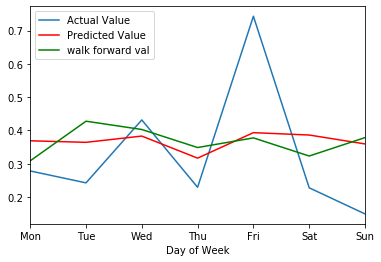

In [396]:
ax = plt.gca()
#prediction.plot(figsize=(20,5))
prediction.plot(kind='line',y='Actual Value',ax=ax)
prediction.plot(kind='line',y='Predicted Value', color='red', ax=ax)
prediction.plot(kind='line', y='walk forward val', color='green', ax=ax)

plt.show()


In [240]:
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1] --> 3 dimentional
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forcast value
	return yhat

forecast(model, history, n_input)


array([[0.18367709, 0.16294013, 0.16647576, 0.18136618, 0.18388079,
        0.15104021, 0.1744395 ]], dtype=float32)